In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 

In [2]:
rstae_fp = pd.read_csv('./saved_results/rstae_fp_delay.csv')
gcnae_fp = pd.read_csv('./saved_results/gcnae_fp_delay.csv')
gatae_fp = pd.read_csv('./saved_results/gatae_fp_delay.csv')
stae_fp = pd.read_csv('./saved_results/stae_fp_delay.csv')

In [3]:
# Not all achieve FPR of 0, so the plot has some strange behavior here. Just filter that out since the trend can more clearly be seen without it
rstae_fp = rstae_fp[rstae_fp['FPR'] > 0]
gcnae_fp = gcnae_fp[gcnae_fp['FPR'] > 0]
gatae_fp = gatae_fp[gatae_fp['FPR'] > 0]
stae_fp = stae_fp[stae_fp['FPR'] > 0]

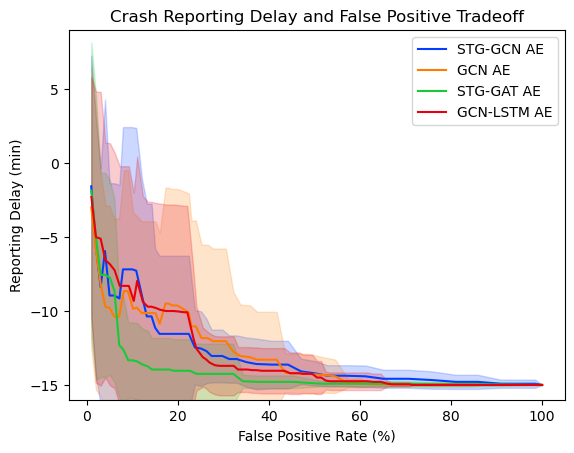

In [4]:
palette = 'bright'

plt.plot(rstae_fp['FPR']*100, rstae_fp['Mean Delay']/2, color=sns.color_palette(palette)[0], label='STG-GCN AE')

std_values = rstae_fp['Std Delay'] / 2
lower_bound = rstae_fp['Mean Delay'] / 2 - std_values  
upper_bound = rstae_fp['Mean Delay'] / 2 + std_values

plt.fill_between(rstae_fp['FPR']*100, lower_bound, upper_bound, color=sns.color_palette(palette)[0], alpha=0.2)

plt.plot(gcnae_fp['FPR']*100, gcnae_fp['Mean Delay']/2, color=sns.color_palette(palette)[1], label='GCN AE')

std_values = gcnae_fp['Std Delay'] / 2
lower_bound = gcnae_fp['Mean Delay'] / 2 - std_values  
upper_bound = gcnae_fp['Mean Delay'] / 2 + std_values

plt.fill_between(gcnae_fp['FPR']*100, lower_bound, upper_bound, color=sns.color_palette(palette)[1], alpha=0.2)

plt.plot(gatae_fp['FPR']*100, gatae_fp['Mean Delay']/2, color=sns.color_palette(palette)[2], label='STG-GAT AE')

std_values = gatae_fp['Std Delay'] / 2
lower_bound = gatae_fp['Mean Delay'] / 2 - std_values  
upper_bound = gatae_fp['Mean Delay'] / 2 + std_values

plt.fill_between(gatae_fp['FPR']*100, lower_bound, upper_bound, color=sns.color_palette(palette)[2], alpha=0.2)

plt.plot(stae_fp['FPR']*100, stae_fp['Mean Delay']/2, color=sns.color_palette(palette)[3], label='GCN-LSTM AE')

std_values = stae_fp['Std Delay'] / 2
lower_bound = stae_fp['Mean Delay'] / 2 - std_values  
upper_bound = stae_fp['Mean Delay'] / 2 + std_values

plt.fill_between(stae_fp['FPR']*100, lower_bound, upper_bound, color=sns.color_palette(palette)[3], alpha=0.2)

plt.ylim(-16, 9)
# plt.xlim(-0.01,1)
plt.xlabel("False Positive Rate (%)")
plt.ylabel("Reporting Delay (min)")
plt.title("Crash Reporting Delay and False Positive Tradeoff")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Crash Reporting Delay Distribution (10% FPR)')

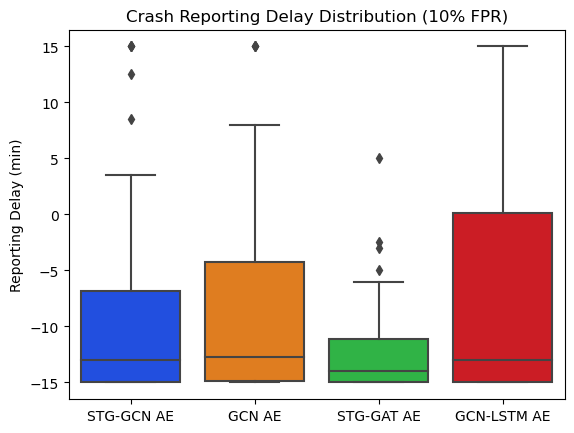

In [5]:
gat_delays = np.load('./saved_results/gatae10delays.npy')
rstae_delays = np.load('./saved_results/rstae10delays.npy')
gcn_delays = np.load('./saved_results/gcnae10delays.npy')
stae_delays = np.load('./saved_results/stae10delays.npy')

sns.boxplot(data=[rstae_delays, gcn_delays, gat_delays, stae_delays], palette=palette)
plt.xticks(ticks=[0, 1, 2, 3], labels=['STG-GCN AE', 'GCN AE', 'STG-GAT AE', 'GCN-LSTM AE'])
plt.ylabel("Reporting Delay (min)")
plt.title("Crash Reporting Delay Distribution (10% FPR)")


/home/austinc/.conda/envs/traffic-anomaly/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/austinc/.conda/envs/traffic-anomaly/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x7f801f537f90>,
 [Text(0, 0, 'rstae'),
  Text(1, 0, 'gcnae'),
  Text(2, 0, 'gatae'),
  Text(3, 0, 'lstmae')])

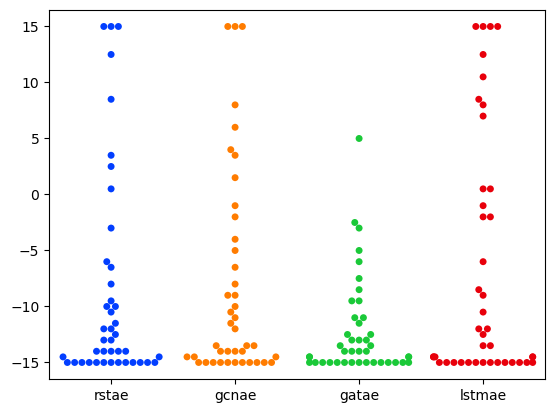

In [6]:
sns.swarmplot(data=[rstae_delays, gcn_delays, gat_delays, stae_delays], palette=palette)
plt.xticks(ticks=[0, 1, 2, 3], labels=['rstae', 'gcnae', 'gatae', 'lstmae'])
